In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

There are 50000 observations and 8 columns...

In [4]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.describe(include='all')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
df["unique_id"].value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
22:00.0    423
14:00.0    416
13:00.0    411
56:00.0    410
45:00.0    410
51:00.0    410
41:00.0    410
50:00.0    408
29:00.0    406
52:00.0    405
46:00.0    403
38:00.0    402
31:00.0    401
01:00.0    400
10:00.0    398
49:00.0    398
19:00.0    397
28:00.0    396
44:00.0    395
39:00.0    394
37:00.0    393
24:00.0    392
06:00.0    391
59:00.0    391
54:00.0    389
27:00.0    389
17:00.0    388
58:00.0    388
40:00.0    387
35:00.0    386
30:00.0    385
12:00.0    385
21:00.0    383
43:00.0    383
48:00.0    382
47:00.0    382
34:00.0    381
25:00.0    379
03:00.0    378
00:00.0    378
42:00.0    378
07:00.0    377
53:00.0    377
05:00.0    377
09:00.0    377
55:00.0    374
57:00.0    372
04:00.0    369
23:00.0    368
18:00.0    362
36:00.0    360
02:00.0    358
08:00.0    353
16:00.0    342
15:00.0    341
48:38.0     17
07:50.0     17
09:09.0     17
35:27.0     17
18:56.0     17
09:25.0     17
51:04.0   

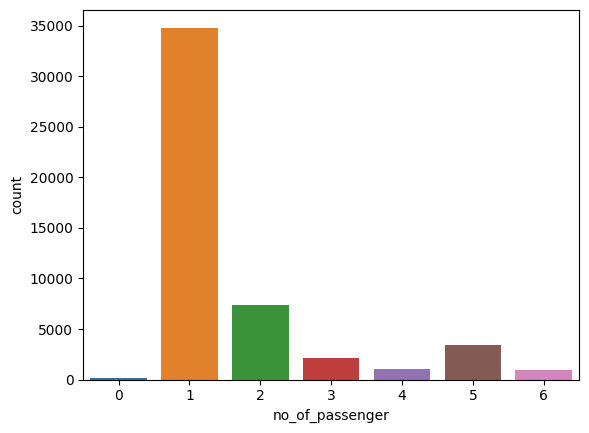

In [10]:
sns.countplot(x="no_of_passenger",data=df)
plt.show()

passenger count 1 are the most who travel by taxiii around 33000

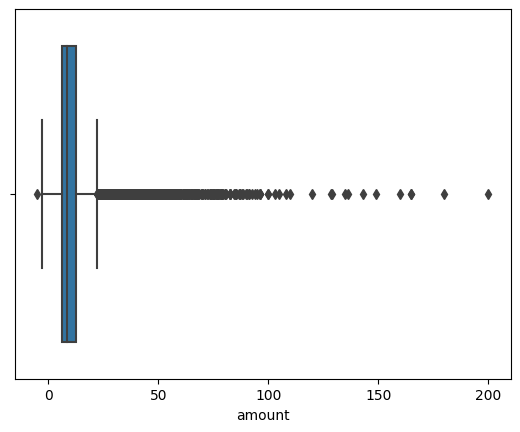

In [11]:
sns.boxplot(x="amount",data=df)
plt.show()

In [12]:
iqr=12.50-6
iqr

6.5

So,iqr is 6.5....IQR = q3-q1

In [13]:
12.50+(1.5*6.50)

22.25

In [14]:
6.00-(1.5*6.50)

-3.75


There are outliers in between -3.75 to 22.25 ...

array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'longitude_of_pickup'}>],
       [<Axes: title={'center': 'latitude_of_pickup'}>,
        <Axes: title={'center': 'longitude_of_dropoff'}>],
       [<Axes: title={'center': 'latitude_of_dropoff'}>,
        <Axes: title={'center': 'no_of_passenger'}>]], dtype=object)

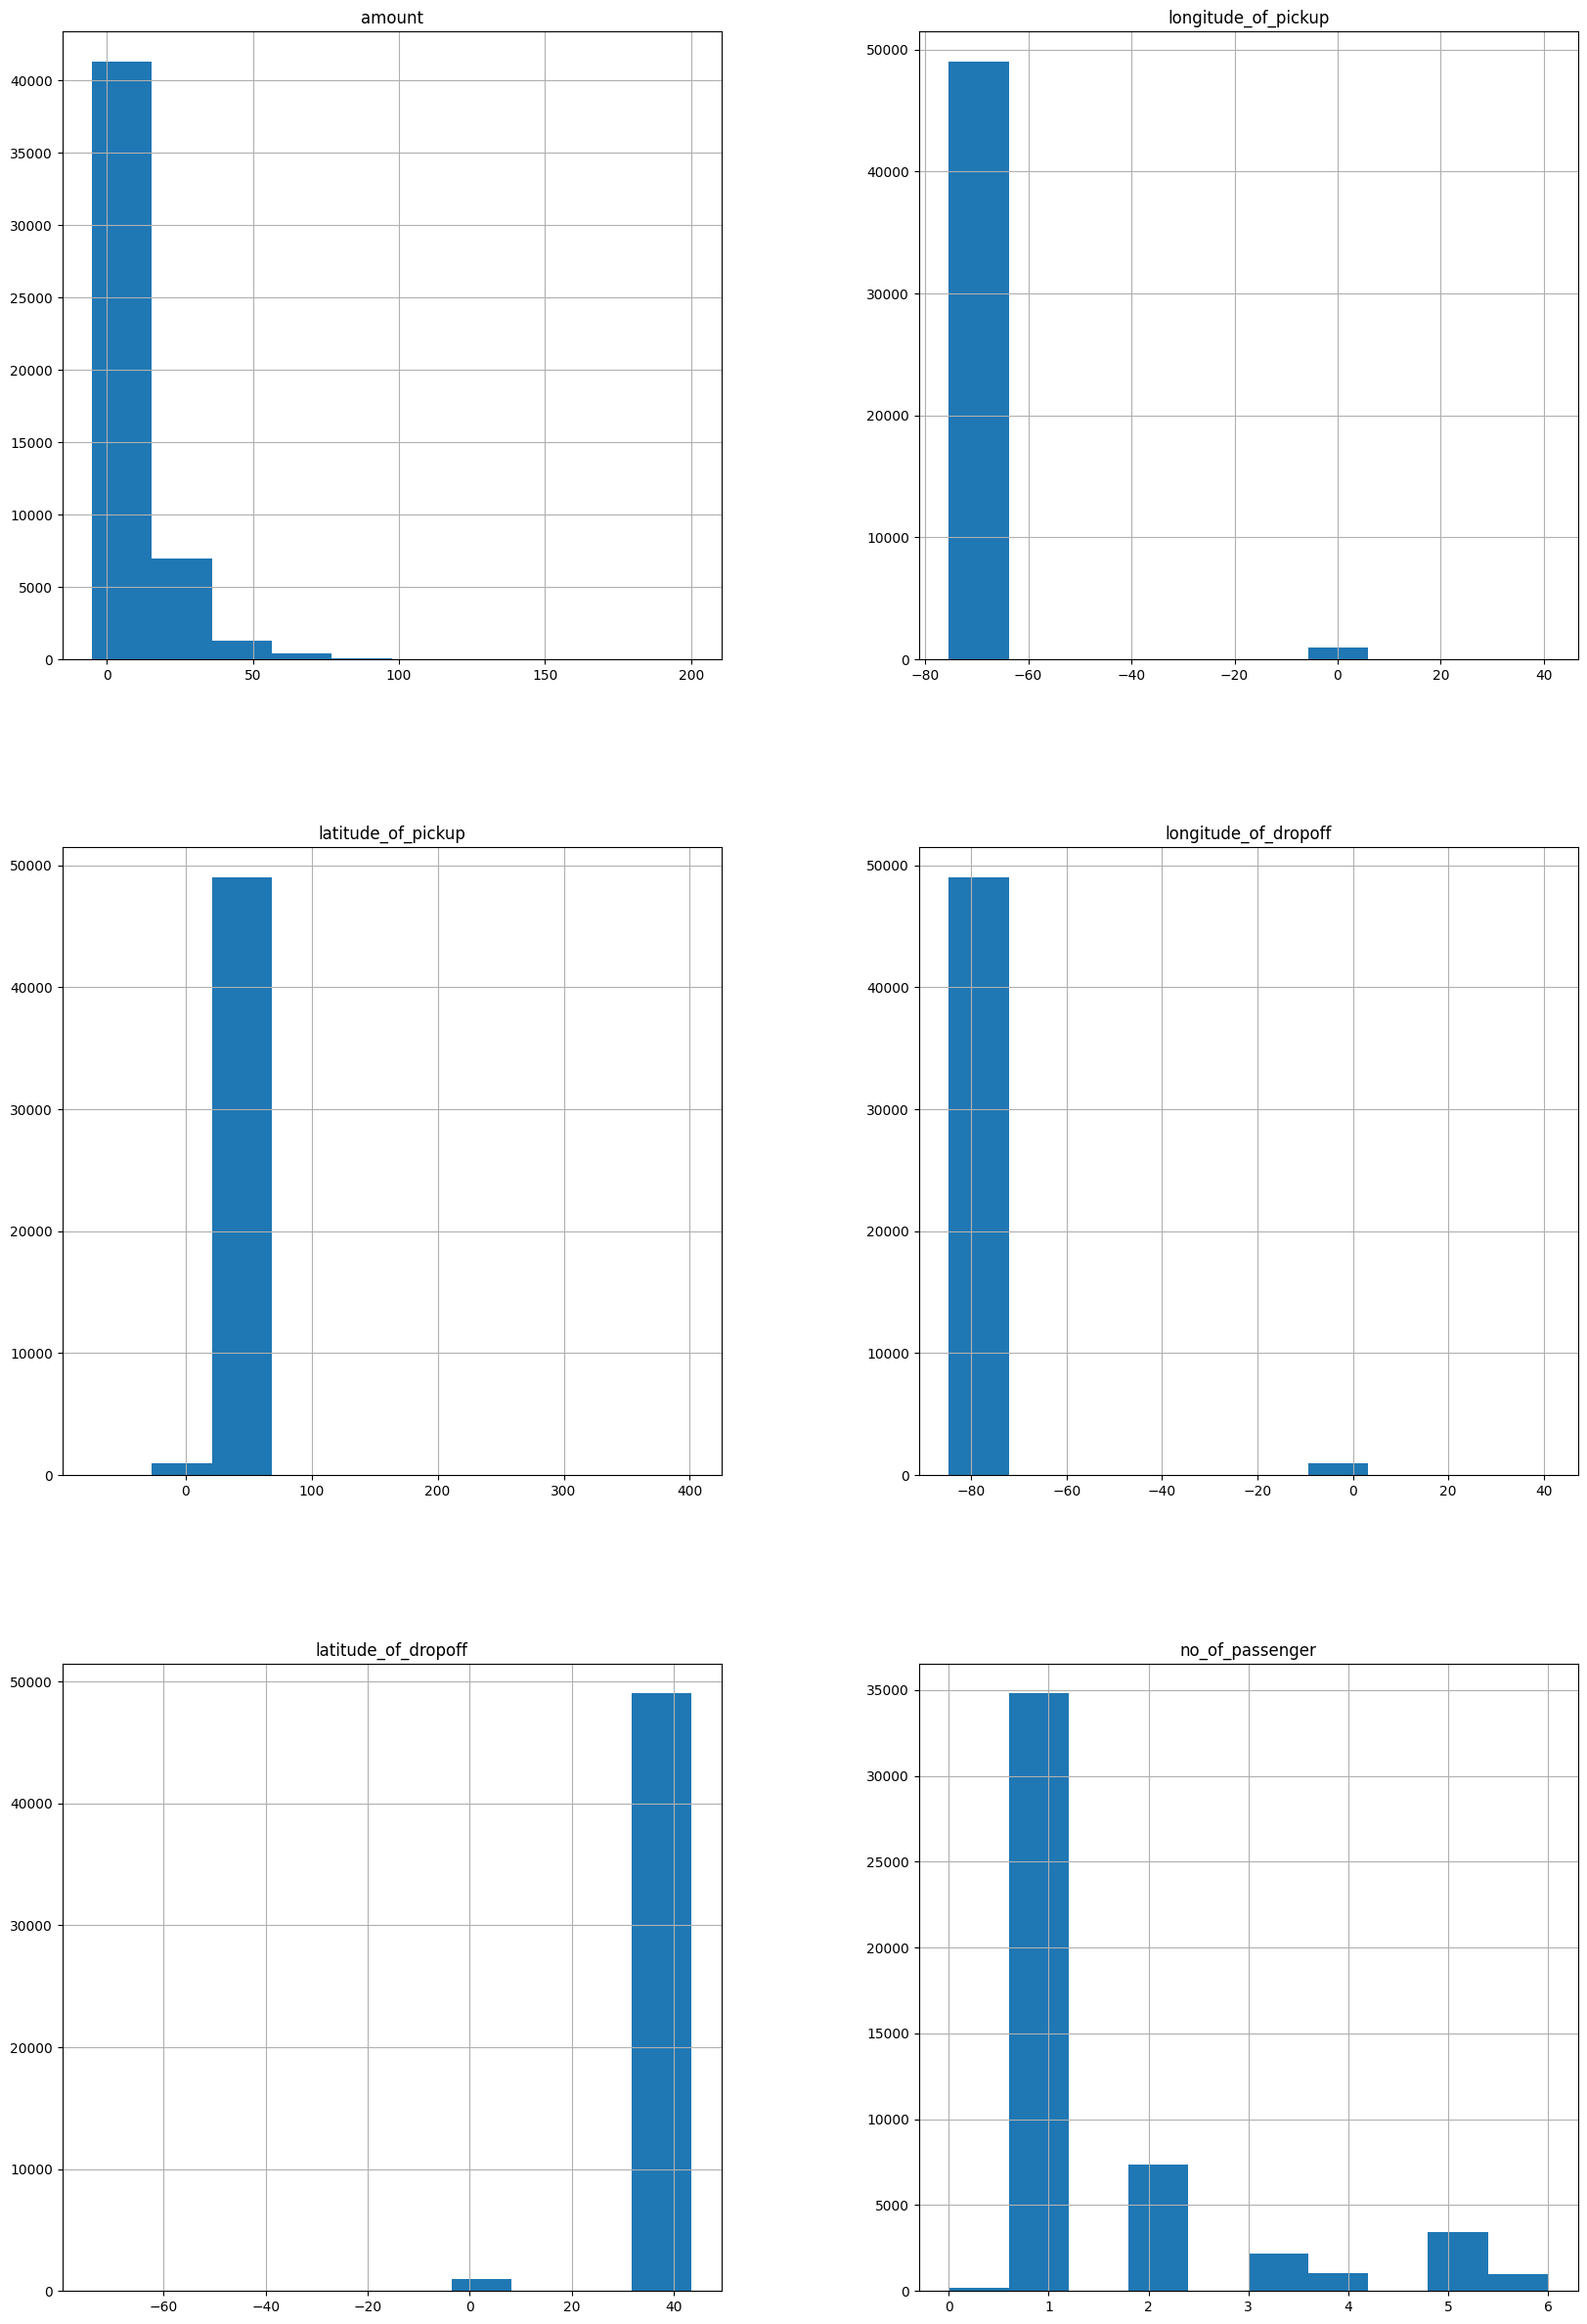

In [15]:
df.hist(figsize=(20,30))

In [16]:
df = df.drop(["unique_id","date_time_of_pickup","longitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1)

In [17]:
df.dtypes

amount                float64
latitude_of_pickup    float64
no_of_passenger         int64
dtype: object

In [18]:
#sns.pairplot(df)

Linear_regression...

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X=df.drop(['amount'],axis=1)
# the depedent variable
y=df[['amount']]

In [21]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

FIT LINEAR MODEL

In [22]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [23]:
model_1.score(X_train,y_train)

0.0005230870139052435

In [24]:
model_1.score(X_test,y_test)

-0.00028053681463435787

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly  = PolynomialFeatures(degree=2,interaction_only=True)
X_train2 =poly.fit_transform(X_train)
X_test2 =poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2,y_train)

print(poly_clf.score(X_train2,y_train))

0.0005596022237072118


In [26]:
print(poly_clf.score(X_test2,y_test))

-0.00015363756381114868


DECISION_TREE_REGRESSION

In [27]:
from sklearn.tree import DecisionTreeRegressor


In [28]:
model_2=DecisionTreeRegressor(max_depth=2)
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [29]:
model_2.score(X_train,y_train)

0.16232065462243817

In [30]:
model_2.score(X_test,y_test)

0.17740216224779948

Bagging_regression...

In [31]:
from sklearn.ensemble import BaggingRegressor

In [32]:
model_3=BaggingRegressor(n_estimators=10,estimator = model_2)
model_3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=2))

In [33]:
model_3.score(X_train,y_train)

0.16446857152787464

In [34]:
model_3.score(X_test,y_test)

0.18277587130698714

Ada boosting regression...

In [35]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
model_4 = AdaBoostRegressor(n_estimators = 5)
model_4.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=5)

In [37]:
model_4.score(X_train,y_train)

0.13194257624395334

In [38]:
model_4.score(X_test,y_test)

0.1323469814561039

Random_Forest_Regression...

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model_5 = RandomForestRegressor(n_estimators = 30,max_features =20)
model_5.fit(X_train,y_train)

<ipython-input-40-0c2854fe4c25>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_5.fit(X_train,y_train)


RandomForestRegressor(max_features=20, n_estimators=30)

In [41]:
model_5.score(X_train,y_train)

0.6708417710023428

In [42]:
model_5.score(X_test,y_test)

-0.08016985826637035

Gradient_Boosting_Regression...

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
model_6 = GradientBoostingRegressor(n_estimators = 10)
model_6.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=10)

In [45]:
model_6.score(X_train,y_train)

0.1565297538481929

In [46]:
model_6.score(X_test,y_test)

0.1686270642733806

SVM...

In [47]:
from sklearn.svm import SVC


In [48]:
model_7=SVC()

In [50]:
model_7.score(X_train,y_train)

NotFittedError: ignored

In [51]:
model_7.score(X_test,y_test)

NotFittedError: ignored